# Exploratory Data Analysis 

### Brief Description Of The Dataset

About dataset

The initial database this was spooled from contains about 76 attributes however only 14 of them were extrated for this analysis. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information 

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

### Initial Plan For Data Exploration

The initial plan is:

1. To explore each attribute and how they relate to the target variable (correlation). 
2. Also, explore the relationships between the variables and how they can have combining factore which can affect or aid prediction. 
3. Finally, carry out hypothese testing to see if a particular change in treatement of a particular column is sufficient to cause significant change in the target variable. 
4. I will also determine the best model fit for predicting the target variable.

### Data Cleaning

#### Let us import the data

In [2]:
%pylab inline
%config InlineBackends.figure_formats=['retina']

import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [121]:
#importing the dataset
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.shape

(303, 14)

In [12]:
#examining each columns to know their data types and check for missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the report above, we can see there are no missing values in all the columns.

We will go ahead and look for outliers

In [17]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
def stats(dataset):
    stats_df = dataset.describe()
    stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

    out_fields = ['mean','25%','50%','75%', 'range']
    stats_df = stats_df.loc[out_fields]
    stats_df.rename({'50%': 'median'}, inplace=True)
    return stats_df

In [16]:
cols = dataset.columns.tolist()
cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [111]:
#let us define the categorical and numerical variables. We will do this manually as teh dataset already carries the categorical values in numeric format
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
num_cols = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'ca']
label = 'target'

In [24]:
stats_df = stats(dataset[num_cols])
stats_df

,age,chol,thalach,oldpeak,ca
mean,54.366337,246.264026,149.646865,1.039604,0.729373
25%,47.500000,211.000000,133.500000,0.000000,0.000000
median,55.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,274.500000,166.000000,1.600000,1.000000
range,48.000000,438.000000,131.000000,6.200000,4.000000


In [25]:
stats(dataset)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531,0.544554
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.00000,0.000000,2.000000,0.000000
median,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.00000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.00000,1.000000,3.000000,1.000000
range,48.000000,1.000000,3.000000,106.000000,438.000000,1.000000,2.000000,131.000000,1.000000,6.200000,2.00000,4.000000,3.000000,1.000000


In [39]:
dataset.groupby('target').agg([np.mean, np.median]).T

target                    0           1
age      mean     56.601449   52.496970
         median   58.000000   52.000000
sex      mean      0.826087    0.563636
         median    1.000000    1.000000
cp       mean      0.478261    1.375758
         median    0.000000    2.000000
trestbps mean    134.398551  129.303030
         median  130.000000  130.000000
chol     mean    251.086957  242.230303
         median  249.000000  234.000000
fbs      mean      0.159420    0.139394
         median    0.000000    0.000000
restecg  mean      0.449275    0.593939
         median    0.000000    1.000000
thalach  mean    139.101449  158.466667
         median  142.000000  161.000000
exang    mean      0.550725    0.139394
         median    1.000000    0.000000
oldpeak  mean      1.585507    0.583030
         median    1.400000    0.200000
slope    mean      1.166667    1.593939
         median    1.000000    2.000000
ca       mean      1.166667    0.363636
         median    1.000000    0.000000
thal     mean      2.543478    2.121212
         median    3.000000    2.000000

From the aggregation function above, we can see that our data has age group from 50. We will use boxplot to check if there are any outlier

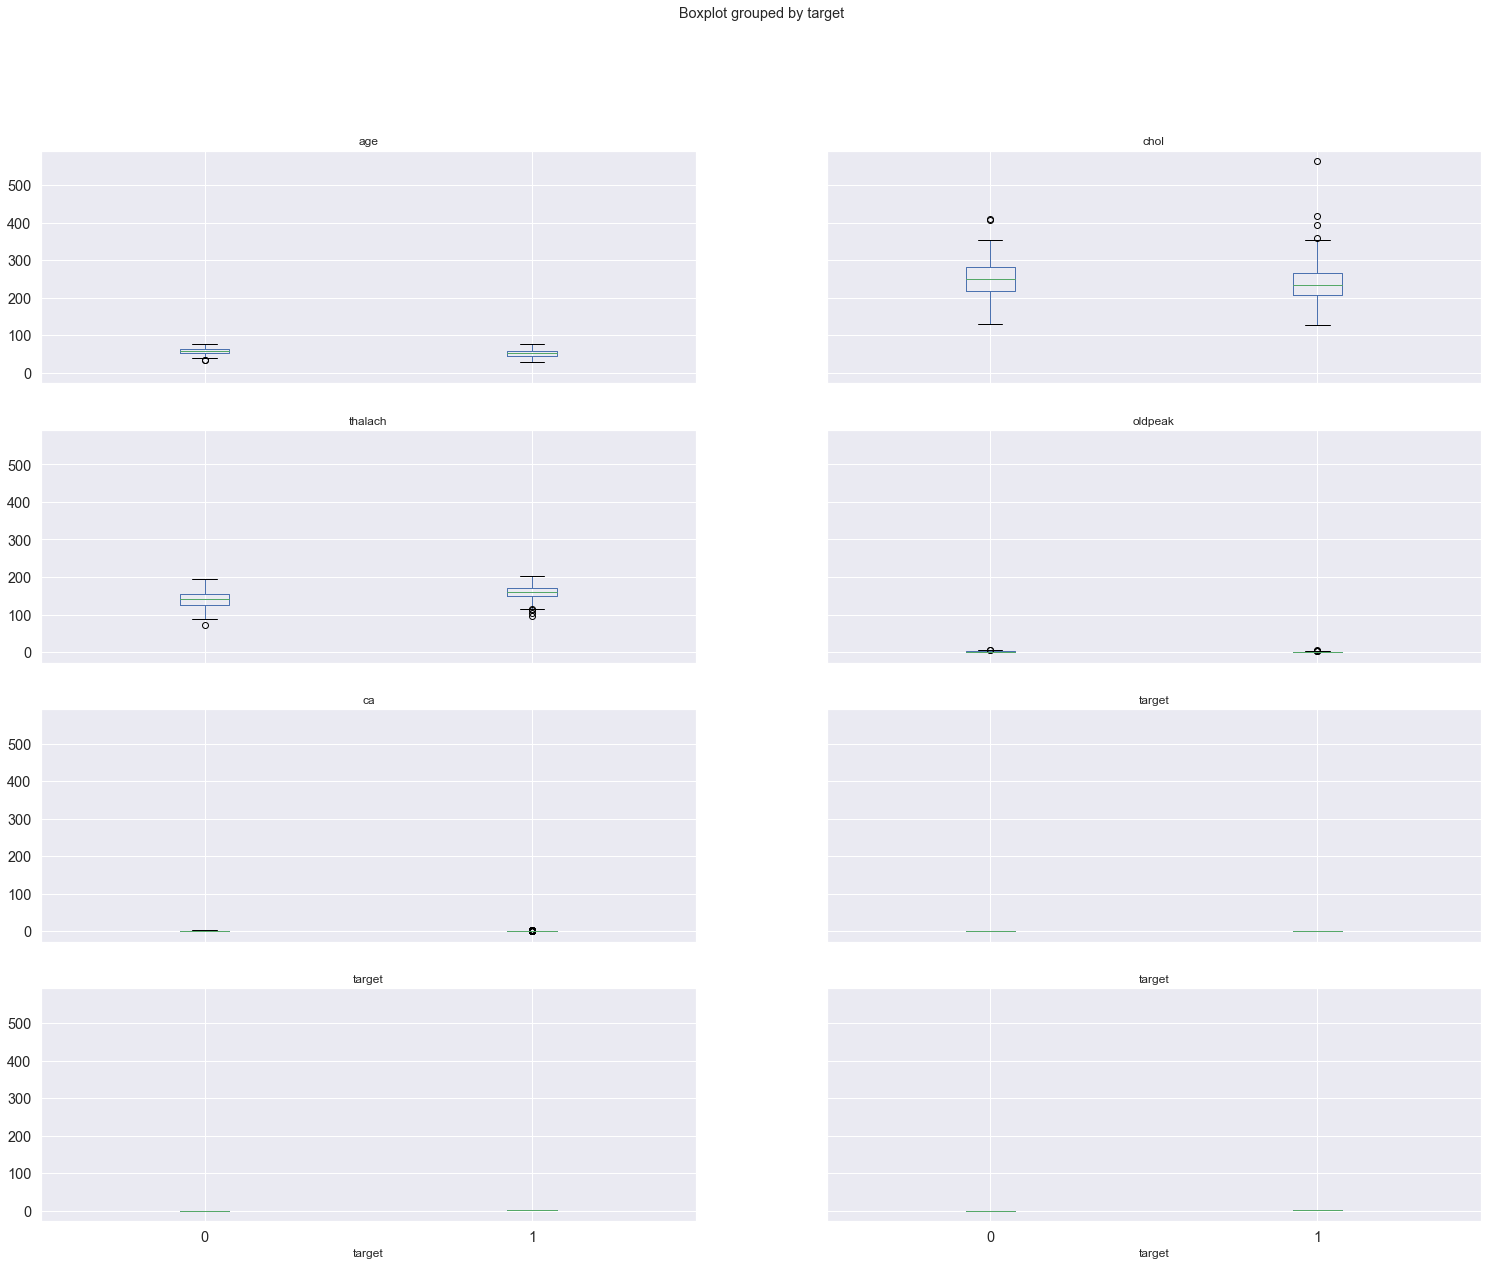

In [59]:
dataset.boxplot(column = num_cols, by='target', layout=(5,2), figsize=(25,25), fontsize='large');


In [65]:
dataset[dataset.chol >= 400]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


The data above shows cholestrol level greater than 400. Though these are considered as outliers from the boxplot, a llittle research shows it is possible to have such level of cholesterol values, though highly severe. Therefore it is not possible to have above 400 without a heart problem.

We will therefore take out roles 220 and 246 as they don't depict accurate situation. That is their other values depict normal heart but not the cholestrol values as they are in the severe state.


In [73]:
dataset.drop([220, 246], inplace=True)

In [74]:
dataset[dataset.chol >= 400]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [77]:
plot_data = (dataset
             .set_index('target')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,target,measurement,size
0,1,age,63.0
1,1,sex,1.0
2,1,cp,3.0
3,1,trestbps,145.0
4,1,chol,233.0


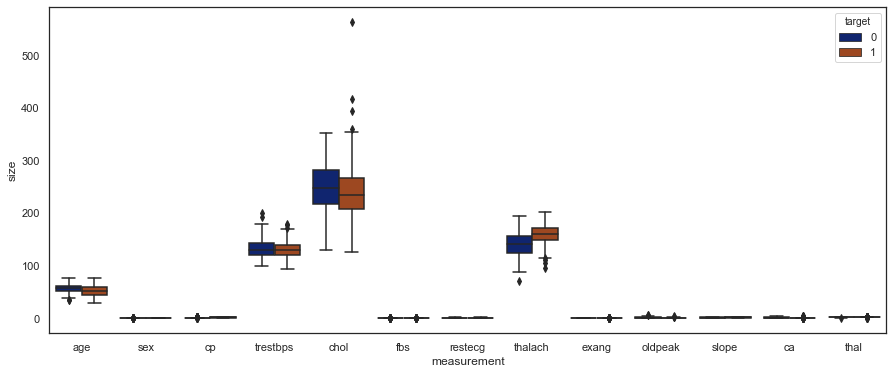

In [80]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(15,6))
sns.boxplot(x='measurement', y='size', 
            hue='target', data=plot_data);

Even though the coholestrol column contans outlier, we can confirm those are relevant outliers.

In [82]:
# Create a list of float colums to check for skewing
mask = dataset.dtypes == np.float
float_cols = dataset.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = dataset[float_cols].skew()
skew_vals

oldpeak    1.286285
dtype: float64

In [83]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
oldpeak,1.286285


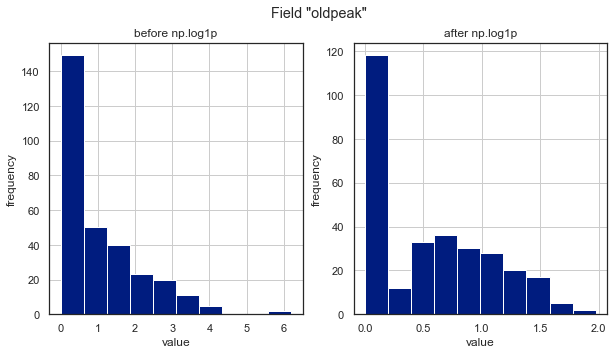

In [87]:
#given old peak is our only float data, let us view a histogram and see if applying log transformation will unskew it

# Choose a field
field = "oldpeak"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
dataset[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
dataset[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

from the abobe we see the log1p changes the distribution to somewhat normal

In [122]:
#apply log1p to the old peak data
dataset['oldpeak'] = dataset['oldpeak'].apply(np.log1p)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,1.193922,0,0,1,1
1,37,1,2,130,250,0,1,187,0,1.504077,0,0,2,1
2,41,0,1,130,204,0,0,172,0,0.875469,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.587787,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.470004,2,0,2,1


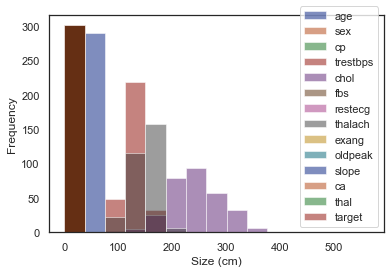

In [91]:
#plotting histogram for the rest of the dataset
sns.set_context('notebook')
ax = dataset.plot.hist(bins=15, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [112]:
num_cols.append('target')
num_cols

['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'ca', 'target']

In [113]:
numeric_cols = dataset.loc[:, num_cols]
numeric_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
age,301.0,54.332226,9.098128,29.0,47.0,55.000000,61.000000,77.000000
chol,301.0,245.189369,50.286983,126.0,211.0,240.000000,274.000000,564.000000
trestbps,301.0,131.554817,17.563821,94.0,120.0,130.000000,140.000000,200.000000
thalach,301.0,149.631229,22.979996,71.0,133.0,153.000000,166.000000,202.000000
oldpeak,301.0,0.564847,0.521840,0.0,0.0,0.587787,0.955511,1.974081
ca,301.0,0.717608,1.014884,0.0,0.0,0.000000,1.000000,4.000000
target,301.0,0.548173,0.498503,0.0,0.0,1.000000,1.000000,1.000000


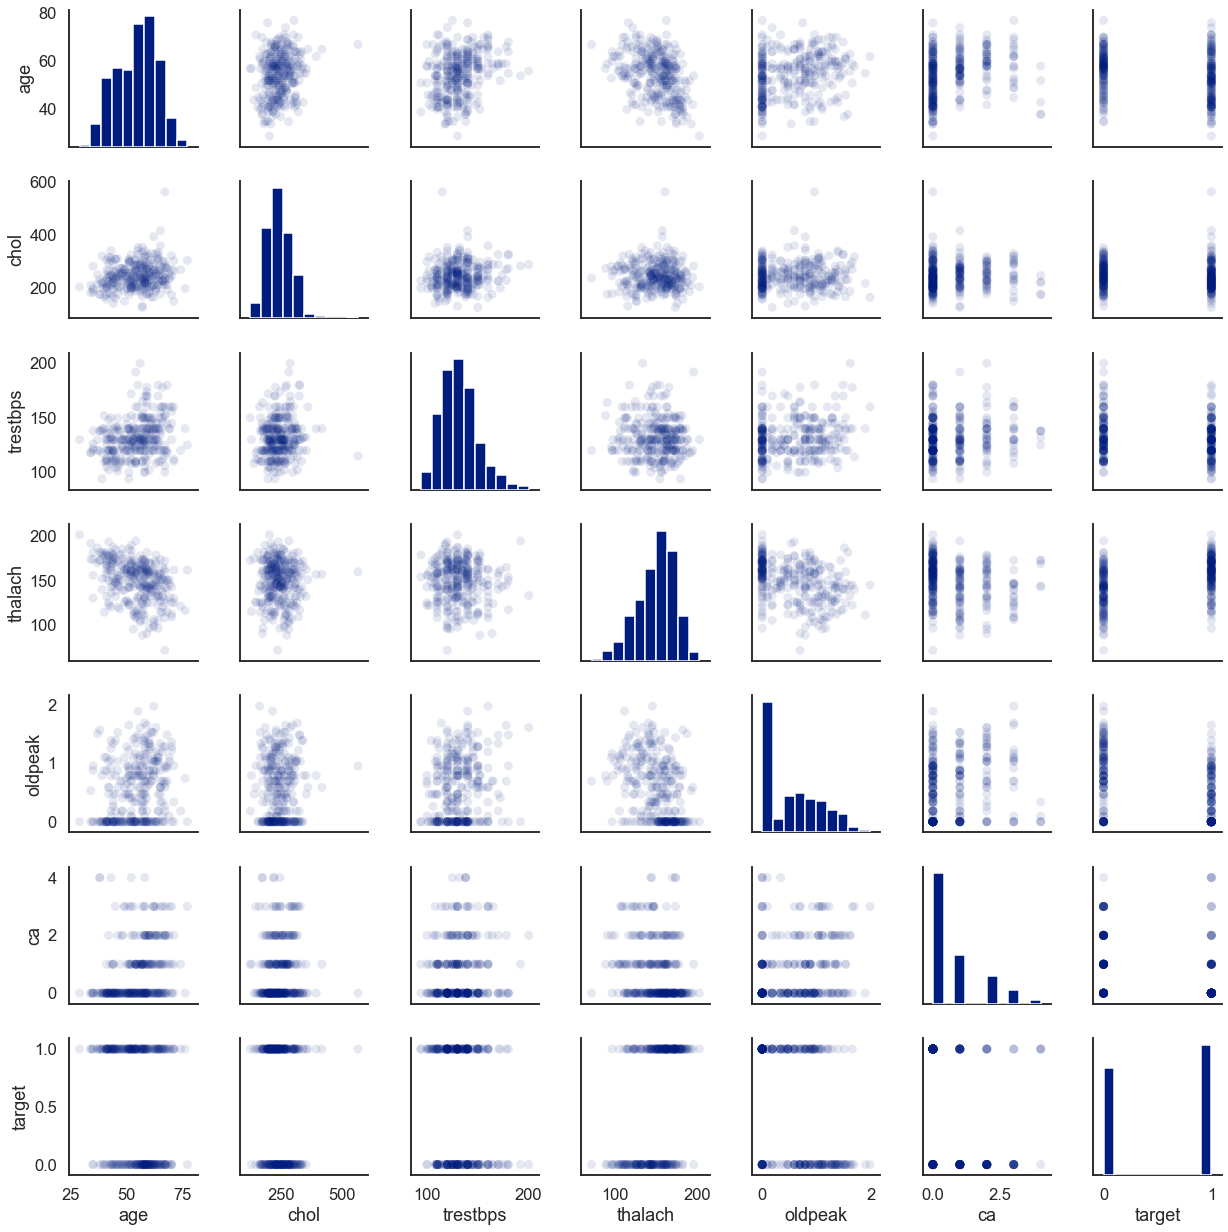

In [114]:
#now lets use pairplot to visualise the correlation between the features
sns.pairplot(numeric_cols, plot_kws=dict(alpha=.1, edgecolor='none'))

In [116]:
#foor the categorical column
categorical_cols = dataset.loc[:,cat_cols]
categorical_cols.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,1
1,1,2,0,1,0,0,2
2,0,1,0,0,0,2,2
3,1,1,0,1,0,2,2
4,0,0,0,1,1,2,2


In [126]:
#now we one hot necode them
dummies = pd.get_dummies(dataset['cp'], drop_first=True).head()
dummies

,1,2,3
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,0


In [127]:
dataset = pd.concat([dataset, dummies], axis =1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,1,2,3
0,63,1,3,145,233,1,0,150,0,1.193922,0,0,1,1,0.0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,1.504077,0,0,2,1,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,0.875469,2,0,2,1,1.0,0.0,0.0
3,56,1,1,120,236,0,1,178,0,0.587787,2,0,2,1,1.0,0.0,0.0
4,57,0,0,120,354,0,1,163,1,0.470004,2,0,2,1,0.0,0.0,0.0


In [130]:
dataset = dataset.rename(columns={1: 'cp1', 2: 'cp2', 3: 'cp3'})
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp1,cp2,cp3
0,63,1,3,145,233,1,0,150,0,1.193922,0,0,1,1,0.0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,1.504077,0,0,2,1,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,0.875469,2,0,2,1,1.0,0.0,0.0
3,56,1,1,120,236,0,1,178,0,0.587787,2,0,2,1,1.0,0.0,0.0
4,57,0,0,120,354,0,1,163,1,0.470004,2,0,2,1,0.0,0.0,0.0


In [131]:
dataset.drop('cp', inplace=True, axis=1)
dataset.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp1,cp2,cp3
0,63,1,145,233,1,0,150,0,1.193922,0,0,1,1,0.0,0.0,1.0
1,37,1,130,250,0,1,187,0,1.504077,0,0,2,1,0.0,1.0,0.0
2,41,0,130,204,0,0,172,0,0.875469,2,0,2,1,1.0,0.0,0.0
3,56,1,120,236,0,1,178,0,0.587787,2,0,2,1,1.0,0.0,0.0
4,57,0,120,354,0,1,163,1,0.470004,2,0,2,1,0.0,0.0,0.0


## Determining The Best Model

Given that all features are normally distributed except for 'oldpeak' of which upon applying log1p, becomes normally distributed, also, given the target variable is categorical, I would say a *Logistic Regression* model would suffice in properly predicting the target variable